<h1 align="center">USA Air Quality 1980-2022</h1> 

****

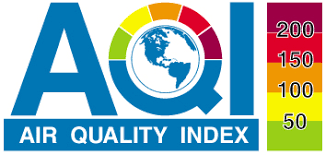

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# read data
df = pd.read_csv('US_AQI.csv',index_col='Unnamed: 0')
df.head()

,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles


### Data
- CBSA Code - The core-based statistical area (CBSA) code. CBSA = a U.S. geographic area defined by the Office of Management and Budget (OMB) that consists of one or more counties.
- Date - The day of measurement.
- AQI - The average air quality index (AQI) value for the day.
- Category - The category of air quality ranging from "Good" to "Hazardous".
- Defining Parameter - One of PM2.5 (particulate matter), PM10, Ozone, Carbon Monoxide, Sulfur Dioxide, or Nitrogen Dioxide which has the highest concentration.
- Number of Sites Reporting - The number of stations used to make the data aggregation.
- city_ascii - Name of the city where the measurement was taken.
- state_id - Abbreviation of the state where the measurement was taken.
- state_name - The state where the measurement was taken.
- lat - The latitude where the measurement was taken.
- lng - The longitude where the measurement was taken.
- population - The population of the region where the measurement was taken.
- density - The population per square kilometer where the measurement was taken.
- timezone - The time zone of the region where the measurement was taken.

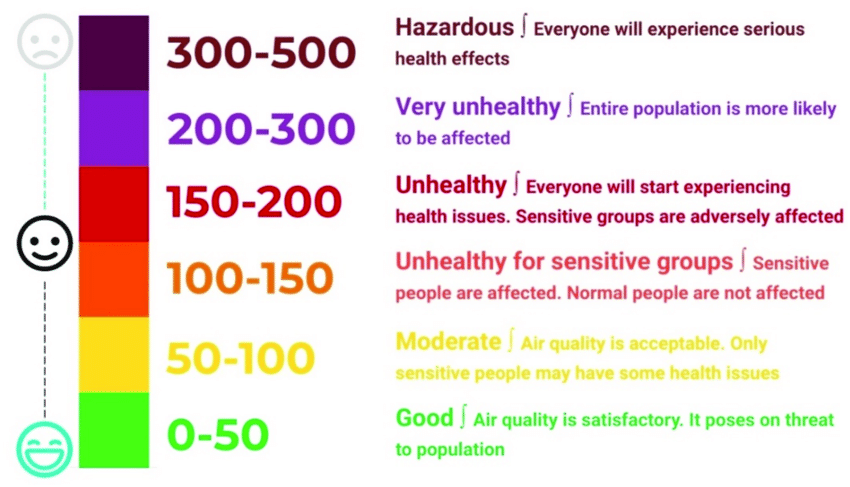

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617325 entries, 0 to 5718370
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CBSA Code                  int64  
 1   Date                       object 
 2   AQI                        int64  
 3   Category                   object 
 4   Defining Parameter         object 
 5   Number of Sites Reporting  int64  
 6   city_ascii                 object 
 7   state_id                   object 
 8   state_name                 object 
 9   lat                        float64
 10  lng                        float64
 11  population                 float64
 12  density                    float64
 13  timezone                   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 642.9+ MB


In [4]:
df.describe().round(2)

,CBSA Code,AQI,Number of Sites Reporting,lat,lng,population,density
count,5617325.00,5617325.00,5617325.00,5617325.00,5617325.00,5617325.00,5617325.00
mean,30282.85,46.66,3.65,38.49,-94.26,564229.22,1083.64
std,11427.15,35.71,5.09,5.60,16.79,1537381.80,1013.63
min,10100.00,0.00,1.00,17.97,-159.35,1903.00,4.00
25%,20100.00,30.00,1.00,34.94,-106.96,28437.00,525.00
50%,30340.00,41.00,2.00,39.19,-88.93,122549.00,834.00
75%,40420.00,54.00,4.00,42.12,-81.54,391371.00,1255.00
max,49740.00,20646.00,72.00,64.84,-66.06,18680025.00,10768.00


In [5]:
df.describe(include='O')

,Date,Category,Defining Parameter,city_ascii,state_id,state_name,timezone
count,5617325,5617325,5617325,5617325,5617325,5617325,5617325
unique,15492,6,5,614,52,52,17
top,2003-06-26,Good,Ozone,Springfield,CA,California,America/New_York
freq,534,3939742,3029724,57683,477820,477820,2018716


In [6]:
df.isna().sum()

CBSA Code                    0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Number of Sites Reporting    0
city_ascii                   0
state_id                     0
state_name                   0
lat                          0
lng                          0
population                   0
density                      0
timezone                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
cat_cols = df.select_dtypes(include='O').columns.to_list()
cat_cols = cat_cols

In [9]:
for col in cat_cols[1:]:
    print(df[col].value_counts())
    print('-'*100)

Good                              3939742
Moderate                          1375385
Unhealthy for Sensitive Groups     219344
Unhealthy                           65035
Very Unhealthy                      16939
Hazardous                             880
Name: Category, dtype: int64
----------------------------------------------------------------------------------------------------
Ozone    3029724
PM2.5    1425807
PM10      463374
NO2       359166
CO        339254
Name: Defining Parameter, dtype: int64
----------------------------------------------------------------------------------------------------
Springfield    57683
Columbus       34200
Cleveland      32840
Jackson        32515
Charleston     31065
               ...  
Sandusky          60
Hutchinson        53
Celina            47
Newport           33
Maysville         19
Name: city_ascii, Length: 614, dtype: int64
----------------------------------------------------------------------------------------------------
CA    477820
PA  

## Feature Extraction & Transform

### Date column

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [11]:
df.head(2)

,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone,Year,Month,Day
0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles,2022,1,1
1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles,2022,1,2


### Density = Total population/ Total area.

In [12]:
df['Area_km2'] = (df['population'] / df['density']).round(2)

In [13]:
df.sample(5)

,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone,Year,Month,Day,Area_km2
712086,11020,2017-06-11,77,Moderate,Ozone,1,Altoona,PA,Pennsylvania,40.5082,-78.4007,73374.0,1722.0,America/New_York,2017,6,11,42.61
2772406,26380,2005-12-07,36,Good,PM2.5,1,Houma,LA,Louisiana,29.5800,-90.7059,146665.0,882.0,America/Chicago,2005,12,7,166.29
836775,39900,2017-08-01,90,Moderate,Ozone,9,Reno,NV,Nevada,39.5497,-119.8483,440547.0,890.0,America/Los_Angeles,2017,8,1,495.00
4679974,32900,1991-11-01,68,Moderate,NO2,1,Merced,CA,California,37.3057,-120.4779,147690.0,1396.0,America/Los_Angeles,1991,11,1,105.80
1418933,16860,2013-10-13,55,Moderate,PM2.5,6,Chattanooga,TN,Tennessee,35.0660,-85.2481,404766.0,491.0,America/New_York,2013,10,13,824.37


### CBSA

In [14]:
df['CBSA Code'].nunique()

671

In [15]:
df['city_ascii'].nunique()

614

In [16]:
df.groupby(['CBSA Code','state_id'])['city_ascii'].value_counts()

CBSA Code  state_id  city_ascii
10100      SD        Aberdeen       3379
10140      WA        Aberdeen       7316
10260      PR        Adjuntas       1127
10300      MI        Adrian         6780
10380      PR        Aguadilla       509
                                   ...  
49420      WA        Yakima        14682
49620      PA        York          15269
49660      OH        Youngstown    15295
49700      CA        Yuba City     13750
49740      AZ        Yuma          11195
Name: city_ascii, Length: 671, dtype: int64

In [17]:
df['city_ascii'].nunique()

614

In [18]:
# Drop unnecessary columns
#CBSA CODE = [City Ascii, state name] , state_id = State_name , lat,lng = Timezone , Area = population / density
df.drop(columns = ['CBSA Code','state_id','lat','lng','Date','population','density'],inplace=True)

In [19]:
df.columns

Index(['AQI', 'Category', 'Defining Parameter', 'Number of Sites Reporting',
       'city_ascii', 'state_name', 'timezone', 'Year', 'Month', 'Day',
       'Area_km2'],
      dtype='object')

In [20]:
df.head()

,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,timezone,Year,Month,Day,Area_km2
0,21,Good,PM2.5,2,Aberdeen,Washington,America/Los_Angeles,2022,1,1,28.18
1,12,Good,PM2.5,2,Aberdeen,Washington,America/Los_Angeles,2022,1,2,28.18
2,18,Good,PM2.5,2,Aberdeen,Washington,America/Los_Angeles,2022,1,3,28.18
3,19,Good,PM2.5,2,Aberdeen,Washington,America/Los_Angeles,2022,1,4,28.18
4,17,Good,PM2.5,2,Aberdeen,Washington,America/Los_Angeles,2022,1,5,28.18


In [21]:
max(df['AQI'])

20646

In [22]:
# not logic
df.drop(df[df['AQI'] > 500].index , inplace = True)

# EDA

## Univariate Analysis

________

### Distribution of AQI

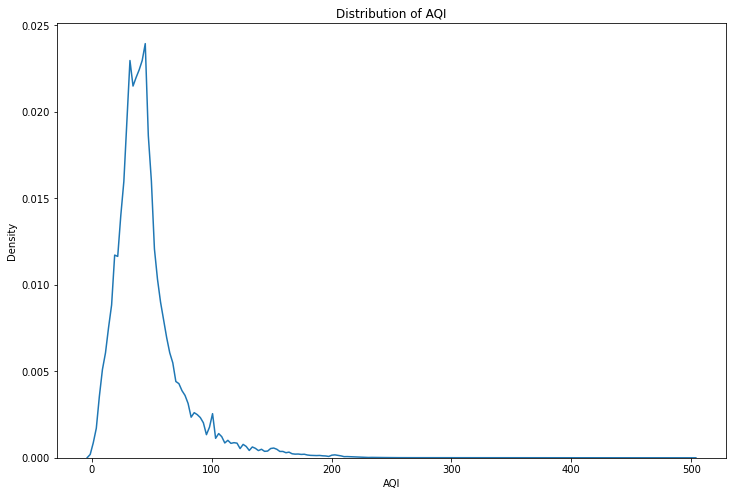

In [23]:
plt.figure(figsize=(12,8))
sns.kdeplot(df.AQI)
plt.title('Distribution of AQI')
plt.show()

##### The majority of AQI ranges from 0 to 100

______________________________________________________

### Percantage of each category

In [24]:
y = df['Category'].value_counts()
y

Good                              3939742
Moderate                          1375385
Unhealthy for Sensitive Groups     219344
Unhealthy                           65035
Very Unhealthy                      16939
Hazardous                             471
Name: Category, dtype: int64

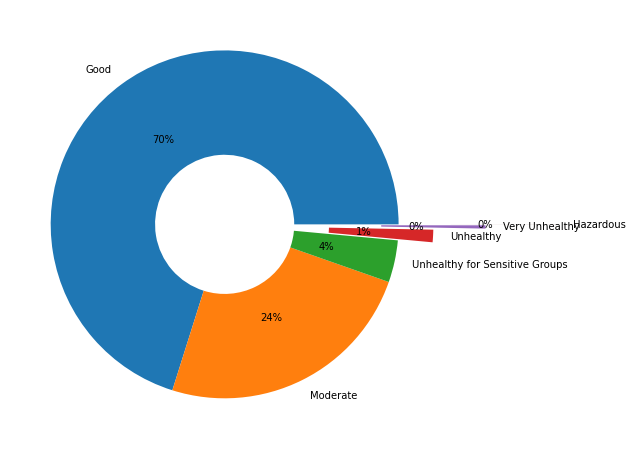

In [25]:
plt.figure(figsize=(12,8))
plt.pie(data=df , x =y , wedgeprops={'width':0.6},autopct='%0.f%%',labels=y.index,explode=[0,0,0,0.2,0.5,0.9])
plt.show()

___________________________________

### Distribution of Area_km2

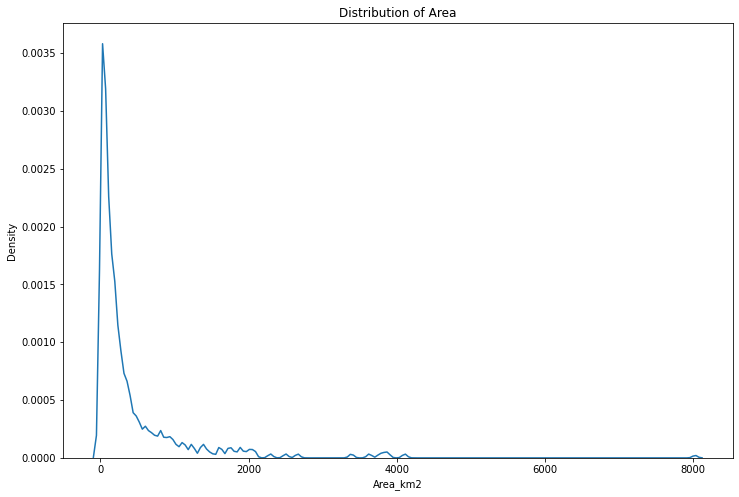

In [26]:
plt.figure(figsize=(12,8))
sns.kdeplot(df.Area_km2)
plt.title('Distribution of Area')
plt.show()

___

### Top 20 city with high number of testing

In [27]:
top_cities = df['city_ascii'].value_counts().nlargest(20)
top_cities

Springfield     57683
Columbus        34200
Cleveland       32840
Jackson         32515
Charleston      31065
Portland        29816
Albany          29012
Rochester       28380
Augusta         25535
Decatur         25193
Greenville      25120
Lafayette       23576
Watertown       23361
Miami           23018
Mount Vernon    22995
Athens          22832
Longview        22334
Fayetteville    20163
Somerset        19759
Huntington      19751
Name: city_ascii, dtype: int64

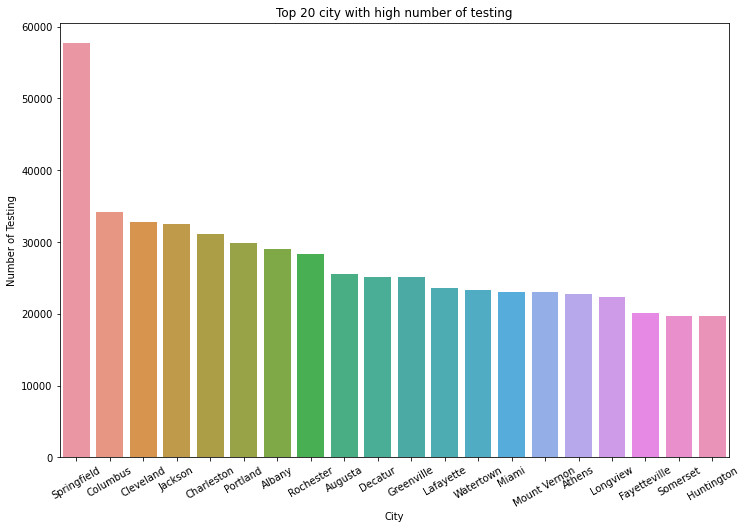

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x = top_cities.index , y =top_cities.values)
plt.title('Top 20 city with high number of testing')
plt.xlabel("City")
plt.ylabel('Number of Testing')
plt.xticks(rotation = 30)
plt.show()

######  Springfield is the most city has the number of testing

______

### Top 20 state with high number of testing

In [29]:
top_states = df['state_name'].value_counts().nlargest(20)
top_states

California        477610
Pennsylvania      278153
Texas             237185
Florida           233186
Ohio              227362
North Carolina    185733
Washington        182005
Indiana           166039
Wisconsin         164427
Michigan          162077
New York          157772
Tennessee         153849
Oregon            149524
Illinois          143358
Colorado          142734
Georgia           126328
Louisiana         124286
South Carolina    122744
New Mexico        117135
Alabama           117116
Name: state_name, dtype: int64

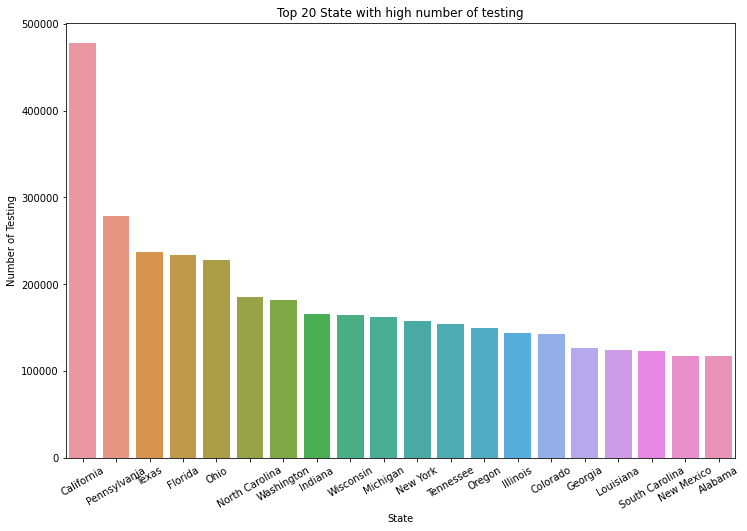

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x = top_states.index , y =top_states.values)
plt.title('Top 20 State with high number of testing')
plt.xlabel("State")
plt.ylabel('Number of Testing')
plt.xticks(rotation = 30)
plt.show()

###### Califorina is the most state has the number of testing

_________

### Percantage of each Defining Parameter

In [31]:
perc = df['Defining Parameter'].value_counts()
perc

Ozone    3029724
PM2.5    1425784
PM10      462988
NO2       359166
CO        339254
Name: Defining Parameter, dtype: int64

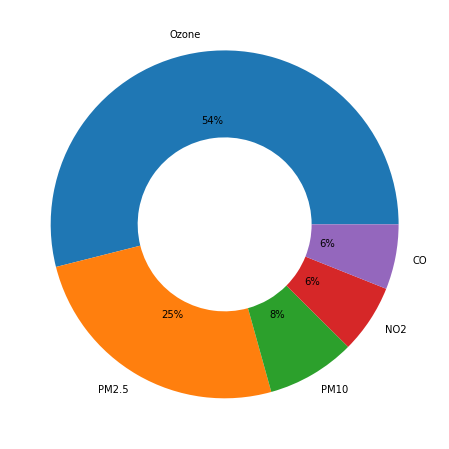

In [32]:
plt.figure(figsize=(12,8))
plt.pie(data=df , x =perc , wedgeprops={'width':0.5},autopct='%0.f%%',labels=perc.index)
plt.show()

_____

## Bivariate

---------

### Top 20 year has hight Average of AQI

In [33]:
#Top 10 year has hight Average of AQI
high_years_AQI = df.groupby('Year')['AQI'].mean().sort_values(ascending  = False).head(20)
high_years_AQI

Year
1980    57.265564
1983    55.729706
1988    55.212357
1987    53.924069
1981    53.843824
1984    53.276649
1999    53.082440
1982    52.769443
1985    52.584818
1986    51.713907
2002    50.583345
2000    50.235159
2001    50.192921
1998    49.156088
2007    48.811883
2005    48.606392
1989    48.502471
2003    48.363789
2006    47.407437
1990    47.388080
Name: AQI, dtype: float64

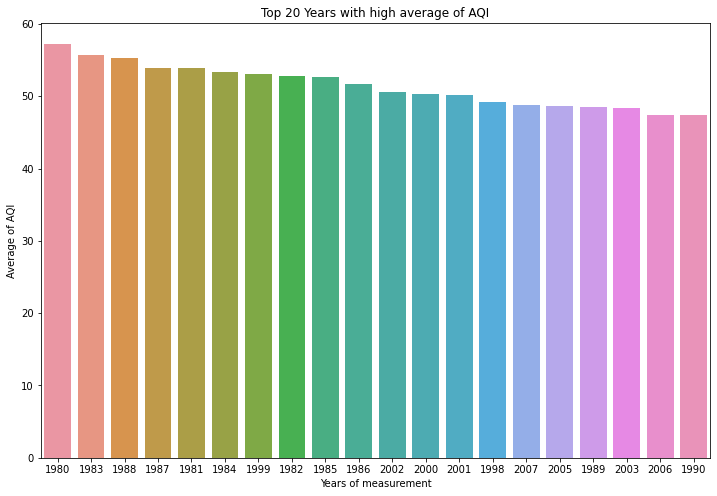

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x = high_years_AQI.index , y =high_years_AQI.values,order=high_years_AQI.index)
plt.title('Top 20 Years with high average of AQI')
plt.ylabel("Average of AQI")
plt.xlabel('Years of measurement')
plt.show()

###### Top 5 years have High Average AQI  (1980,1983,1988,1981,1984)

______

### Months with  Average AQI

In [35]:
high_Month_AQI = df.groupby('Month')['AQI'].mean().sort_values(ascending  = False)
high_Month_AQI

Month
7     57.432100
6     56.228164
8     55.784953
5     52.001195
9     47.824963
4     47.233581
3     41.268416
10    40.418657
2     39.703207
1     38.831033
11    38.735079
12    38.276747
Name: AQI, dtype: float64

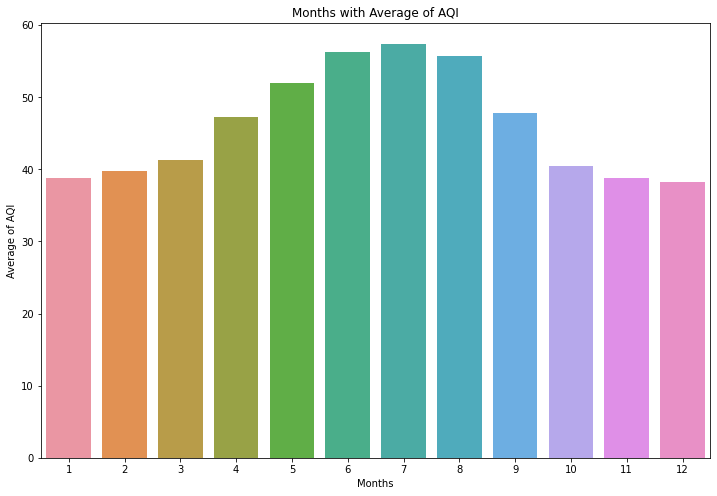

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x = high_Month_AQI.index , y =high_Month_AQI.values)
plt.title('Months with Average of AQI')
plt.ylabel("Average of AQI")
plt.xlabel('Months')
plt.show()

##### Then High AQI is in Summer months (June, July, August)

________

### Days With AQI

In [37]:
 df.groupby('Day')['AQI'].mean().sort_values(ascending  = False)

Day
8     47.138384
9     46.948107
2     46.895397
7     46.894672
17    46.858153
19    46.843508
1     46.808502
18    46.807867
10    46.728412
3     46.690529
16    46.677164
20    46.676797
13    46.660665
4     46.658806
15    46.613238
21    46.598753
30    46.596070
14    46.575208
31    46.500232
6     46.496663
24    46.419603
22    46.372897
11    46.346480
25    46.324264
29    46.281314
26    46.199089
12    46.191719
5     46.168903
23    46.133145
27    46.103554
28    46.074868
Name: AQI, dtype: float64

###### All days are near in  Average AQI

------------

### Defining Parameter with AQI

In [38]:
high_element = df.groupby('Defining Parameter')['AQI'].mean().sort_values(ascending  = False)
high_element

Defining Parameter
Ozone    51.646603
PM2.5    44.276007
NO2      40.359878
CO       38.261291
PM10     31.181067
Name: AQI, dtype: float64

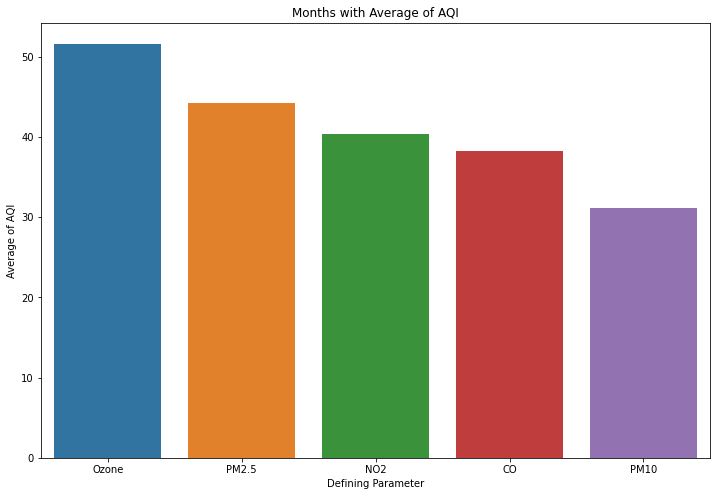

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x = high_element.index , y =high_element.values)
plt.title('Months with Average of AQI')
plt.ylabel("Average of AQI")
plt.xlabel('Defining Parameter')
plt.show()

###### Ozone has the beggist effect on AQI

--------------

### Relation between Area and AQI

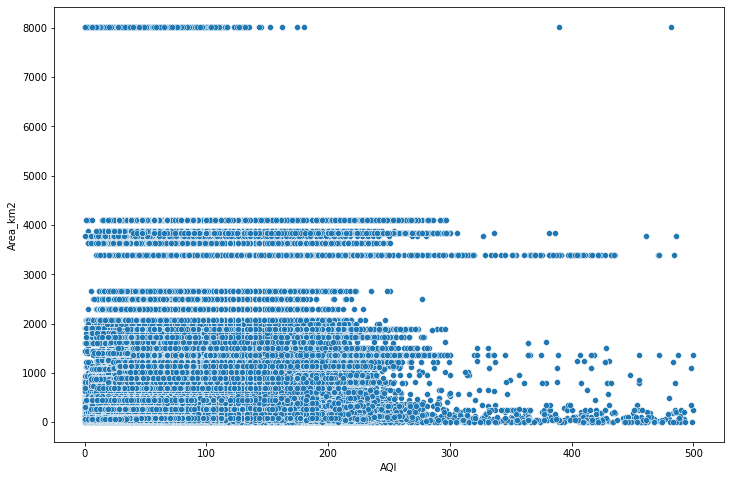

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x = 'AQI', y = 'Area_km2')
plt.show()

____

### Relation between Number of Sites Reporting and AQI

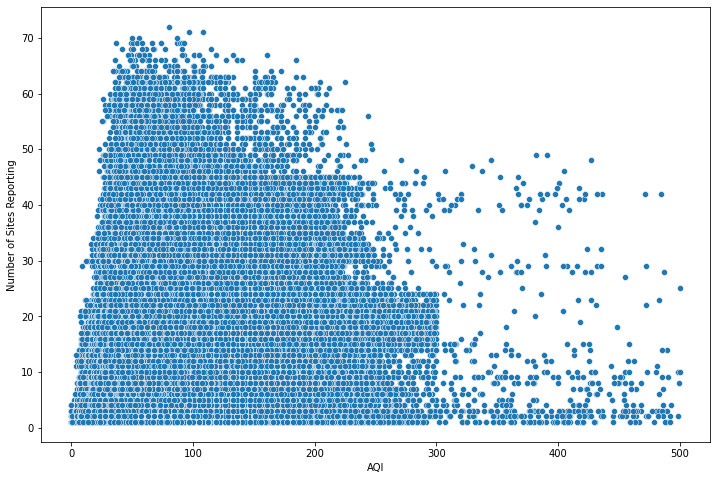

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x = 'AQI', y = 'Number of Sites Reporting')
plt.show()

_____

## Multivariate

-----------

### What's the average of AQI for last 10 year in California for each City ?

In [42]:
California = df[(df['state_name'] == 'California') & (df['Year'] >= 2012) ] 
California.head()

,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,timezone,Year,Month,Day,Area_km2
1325,69,Moderate,PM2.5,2,Bakersfield,California,America/Los_Angeles,2022,1,1,568.84
1326,137,Unhealthy for Sensitive Groups,PM2.5,3,Bakersfield,California,America/Los_Angeles,2022,1,2,568.84
1327,58,Moderate,PM2.5,2,Bakersfield,California,America/Los_Angeles,2022,1,3,568.84
1328,56,Moderate,PM2.5,2,Bakersfield,California,America/Los_Angeles,2022,1,4,568.84
1329,127,Unhealthy for Sensitive Groups,PM2.5,3,Bakersfield,California,America/Los_Angeles,2022,1,5,568.84


In [43]:
order = California.groupby('city_ascii')['AQI'].mean().sort_values(ascending=False)
order

city_ascii
Riverside          103.898947
Los Angeles         89.376677
Bakersfield         88.611972
Visalia             84.707643
Fresno              82.666843
Hanford             72.751989
Sacramento          69.609137
San Diego           68.208433
Madera              68.040241
Modesto             66.208130
El Centro           66.202368
Merced              61.228916
Stockton            60.593758
Chico               59.343360
Bishop              59.217240
Truckee             56.735008
San Luis Obispo     56.540104
Oxnard              56.356589
Yuba City           55.562585
San Francisco       53.086538
Red Bluff           51.265211
San Jose            51.243590
Santa Maria         48.800271
Redding             48.656509
Sonora              48.231690
Vallejo             46.706731
Napa                43.815713
Salinas             39.995620
Ukiah               39.580905
Santa Cruz          38.615553
Santa Rosa          37.777718
Eureka              35.936182
Clearlake           34.430915

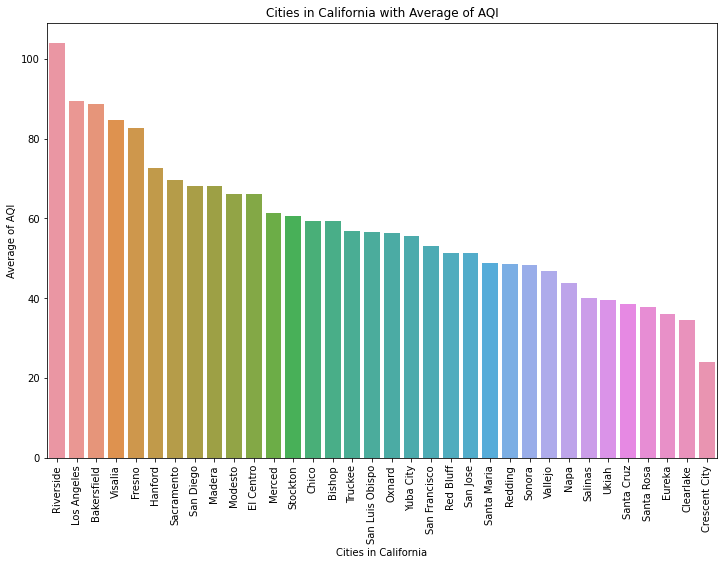

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x = order.index , y = order.values,order = order.index)
plt.title('Cities in California with Average of AQI')
plt.ylabel("Average of AQI")
plt.xlabel('Cities in California')
plt.xticks(rotation = 90)
plt.show()

##### Riverside is the most city in california has high Average AQI

________

### What's the average of AQI for Defining parameters in Summer Months ?

In [45]:
summer_months = df[(df['Month'] == 6) | (df['Month'] == 7) | (df['Month'] == 8)]
summer_months.head()

,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,timezone,Year,Month,Day,Area_km2
26212,25,Good,PM10,1,Aberdeen,South Dakota,America/Chicago,2021,6,1,42.84
26213,29,Good,PM10,1,Aberdeen,South Dakota,America/Chicago,2021,6,2,42.84
26214,35,Good,PM10,1,Aberdeen,South Dakota,America/Chicago,2021,6,3,42.84
26215,38,Good,PM10,1,Aberdeen,South Dakota,America/Chicago,2021,6,4,42.84
26216,28,Good,PM10,1,Aberdeen,South Dakota,America/Chicago,2021,6,5,42.84


In [46]:
order_parameters = summer_months.groupby('Defining Parameter')['AQI'].mean().sort_values(ascending=False)
order_parameters

Defining Parameter
Ozone    63.494900
PM2.5    45.899035
NO2      37.014295
PM10     31.450785
CO       30.743932
Name: AQI, dtype: float64

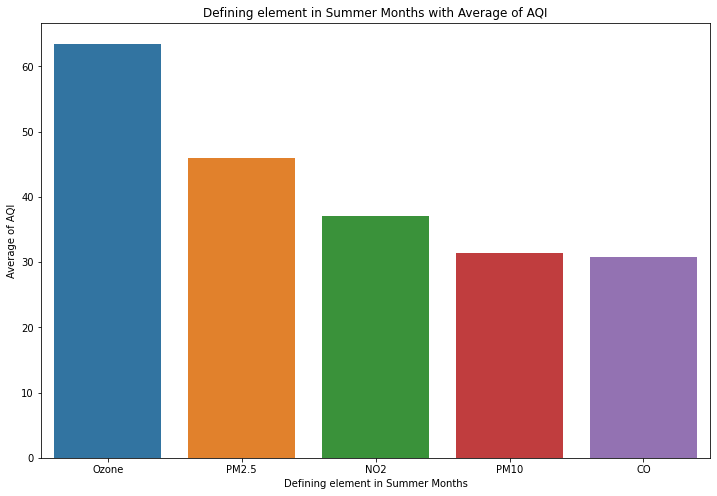

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x = order_parameters.index , y =order_parameters.values,order = order_parameters.index)
plt.title('Defining element in Summer Months with Average of AQI')
plt.ylabel("Average of AQI")
plt.xlabel('Defining element in Summer Months')
#plt.xticks(rotation = 90)
plt.show()

##### Ozone is most effective parameter in summer months and CO is least effective parameter in Summer months 

--------------

### What's the most effective Parameter in each month in california

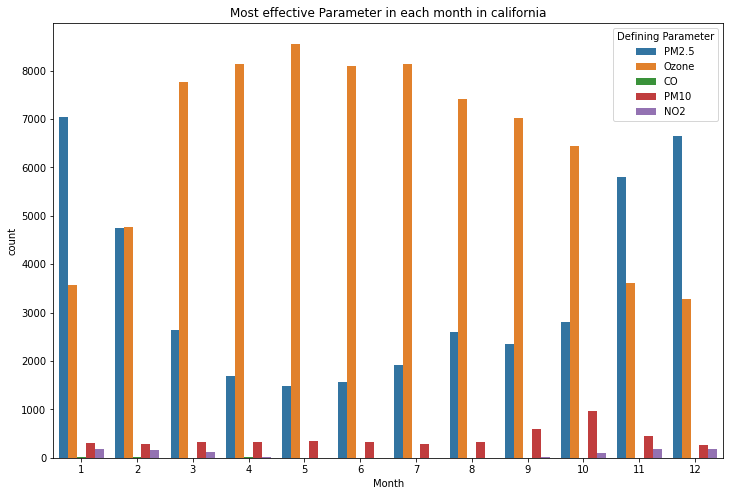

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(data=California, x='Month', hue='Defining Parameter')
plt.title('Most effective Parameter in each month in california')
plt.show()

##### in California most effective parameter in winter months is pm 2.5

________

### Correlation between all columns

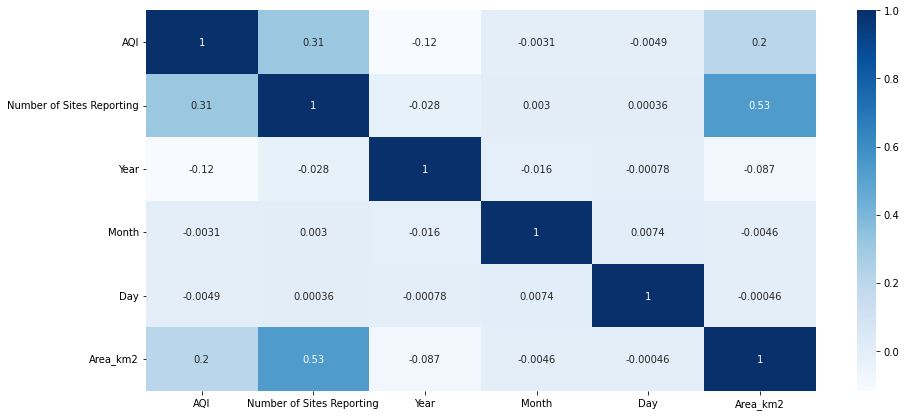

In [49]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot = True,cmap='Blues')
plt.show()

In [50]:
#Saving Clean data
df.to_csv('Cleaned_data.csv',index=False)

In [51]:
df.drop(columns= 'Area_km2', inplace=True)

## Data spliting 

In [52]:
from sklearn.model_selection import train_test_split

x = df.drop(columns= 'AQI')
y = df.AQI

x_train, x_test , y_train , y_test = train_test_split(x, y, test_size= 0.25, random_state=42)

In [53]:
y_train = pd.DataFrame(y_train)

In [54]:
df_train = pd.concat([x_train,y_train ],axis=1)
df_train.head()

,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,timezone,Year,Month,Day,AQI
4286901,Moderate,Ozone,1,Florence,South Carolina,America/New_York,1994,6,22,93
2690939,Good,Ozone,2,State College,Pennsylvania,America/New_York,2006,9,15,38
5289740,Good,Ozone,2,Shreveport,Louisiana,America/Chicago,1985,10,15,24
1158402,Good,Ozone,2,New Haven,Connecticut,America/New_York,2015,3,29,43
1674354,Moderate,PM2.5,2,Pittsfield,Massachusetts,America/New_York,2012,8,12,53


___________

## Handling Outliers

### Area

In [55]:
#plt.figure(figsize=(12,8))
#sns.boxplot(y = df_train['Area_km2'])
#plt.ylim(0,4500)
#plt.show()

In [56]:
# Length of columns that will be dropped
#len(df_train[df_train['Area_km2'] > 2200])

In [57]:
#df_train.drop(df_train[df_train['Area_km2'] > 2200].index , inplace=True)

### Number of Sites Reporting

In [58]:
df_train.quantile([0.8,0.9,0.95,0.99,0.995,0.998,0.999,1])

,Number of Sites Reporting,Year,Month,Day,AQI
0.800,5.0,2015.0,10.0,25.0,60.0
0.900,9.0,2018.0,11.0,28.0,80.0
0.950,14.0,2020.0,12.0,29.0,101.0
0.990,24.0,2021.0,12.0,31.0,161.0
0.995,32.0,2021.0,12.0,31.0,185.0
0.998,41.0,2022.0,12.0,31.0,208.0
0.999,44.0,2022.0,12.0,31.0,223.0
1.000,72.0,2022.0,12.0,31.0,500.0


In [59]:
len(df_train[df_train['Number of Sites Reporting'] > 40])

8559

In [60]:
df_train.drop(df_train[df_train['Number of Sites Reporting'] > 40].index , inplace = True)

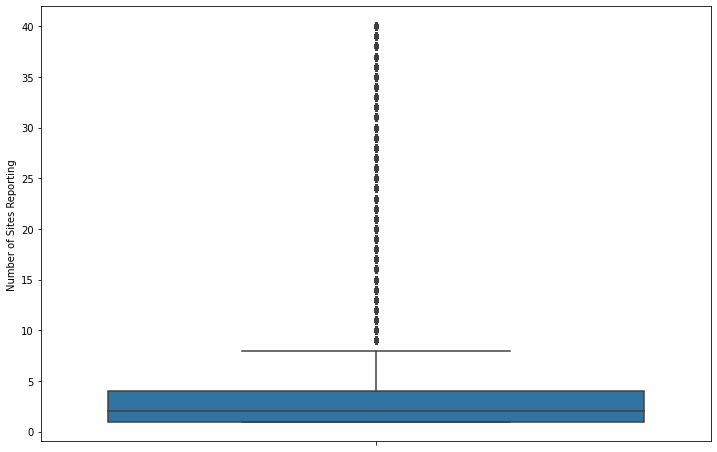

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(y = df_train['Number of Sites Reporting'])
plt.show()

In [62]:
x_train = df_train.drop(columns='AQI')
y_train = df_train.AQI

____________

## Data Pre-processing

In [63]:
cat_cols = df.select_dtypes(include = 'O').columns.to_list()
num_cols = df.select_dtypes(exclude = 'O').columns.to_list()
num_cols.remove('AQI')

In [64]:
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers= 
                                 [('num' , RobustScaler() , num_cols)
                                  ,('cat', BinaryEncoder() , cat_cols)])

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

____

## Model Building

### Linear Regression

In [65]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

# model Evaluation
from sklearn.metrics import r2_score , mean_squared_error

y_pred = lr.predict(x_test)


print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

RMSE: 11.467737117608616
R2 Score: 0.8477880336633532


In [66]:
# check of overfitting or underfitting
print('Train Accuracy: ' , lr.score(x_train,y_train))
print('Test Accuracy: ' , lr.score(x_test , y_test))

Train Accuracy:  0.847214231595621
Test Accuracy:  0.8477880336633532


In [67]:
#CROSS VAL

from sklearn.model_selection import cross_val_score
for i in {3,4,5}:
    score  = cross_val_score(lr,x_train ,y_train ,cv = i)
    print(f'AVG Score of cv = ({i}):',score.mean().round(4) * 100 ,'%')
    print('-'*30)

AVG Score of cv = (3): 84.72 %
------------------------------
AVG Score of cv = (4): 84.72 %
------------------------------
AVG Score of cv = (5): 84.72 %
------------------------------


### Ridge Regression

In [68]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)

# Model Evaluation
y_pred = ridge.predict(x_test)


print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

RMSE: 11.467737110394088
R2 Score: 0.847788033854871


In [69]:
# check of overfitting or underfitting
print('Train Accuracy: ' , ridge.score(x_train,y_train))
print('Test Accuracy: ' , ridge.score(x_test , y_test))

Train Accuracy:  0.8472142313020258
Test Accuracy:  0.847788033854871


In [70]:
#CROSS VAL

from sklearn.model_selection import cross_val_score
for i in {3,4,5}:
    score  = cross_val_score(ridge,x_train ,y_train ,cv = i)
    print(f'AVG Score of cv = ({i}):',score.mean().round(4) * 100 ,'%')
    print('-'*30)

AVG Score of cv = (3): 84.72 %
------------------------------
AVG Score of cv = (4): 84.72 %
------------------------------
AVG Score of cv = (5): 84.72 %
------------------------------


### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth= 15)
dt.fit(x_train, y_train)

# Model Evaluation
y_pred = dt.predict(x_test)


print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

RMSE: 9.783663492700493
R2 Score: 0.8892110739590466


In [72]:
# check of overfitting or underfitting
print('Train Accuracy: ' , dt.score(x_train,y_train))
print('Test Accuracy: ' , dt.score(x_test , y_test))

Train Accuracy:  0.8934443392786761
Test Accuracy:  0.8892110739590466


### Voting Regressor

In [73]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


vot_reg = VotingRegressor(estimators=[('lr',LinearRegression()),('DT',DecisionTreeRegressor(max_depth= 15))])

vot_reg.fit(x_train , y_train)


# Model Evaluation
y_pred = vot_reg.predict(x_test)


print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

RMSE: 10.171789731643798
R2 Score: 0.880246535421906


In [74]:
# check of overfitting or underfitting
print('Training Score: ', vot_reg.score(x_train, y_train))
print('Testing Score: ', vot_reg.score(x_test, y_test))

Training Score:  0.8819637066472552
Testing Score:  0.880246535421906


### Boosting Regressor

#### XGBoost

In [75]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)


# Model Evaluation
y_pred = xgb.predict(x_test)


print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

RMSE: 9.786561383695904
R2 Score: 0.8891454335618597


In [76]:
# check of overfitting or underfitting
print('Training Score: ', xgb.score(x_train, y_train))
print('Testing Score: ', xgb.score(x_test, y_test))

Training Score:  0.8890295150136777
Testing Score:  0.8891454335618597


In [77]:
#CROSS VAL

from sklearn.model_selection import cross_val_score
for i in {3,4,5}:
    score  = cross_val_score(xgb,x_train ,y_train ,cv = i)
    print(f'AVG Score of cv = ({i}):',score.mean().round(4) * 100 ,'%')
    print('-'*30)

AVG Score of cv = (3): 88.87 %
------------------------------
AVG Score of cv = (4): 88.89 %
------------------------------
AVG Score of cv = (5): 88.87 %
------------------------------


______

## Hyperparameter Tuning

### Decision Tree

In [78]:
from sklearn.model_selection import RandomizedSearchCV
param_grid  = {'max_depth': range(12,17)
              , 'min_samples_leaf': range(1,5)
              , 'min_samples_split': range(2,5)
              , 'max_features': ['auto', 'sqrt', 'log2']}

dt_ran = RandomizedSearchCV(DecisionTreeRegressor(random_state = 42),param_grid,cv = 3)

dt_ran.fit(x_train , y_train)

print('Best Parameters:',dt_ran.best_params_)
print('Best Score:',dt_ran.best_score_)

# Checking the score
print('Training Score: ', dt_ran.score(x_train , y_train))
print('Testing Score: ', dt_ran.score(x_test , y_test))

Best Parameters: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 16}
Best Score: 0.8889892121886138
Training Score:  0.8965024794077675
Testing Score:  0.8907502537505124


______

## Saving

In [79]:
import pickle
#Preprocessor Saving
pickle.dump(preprocessor,open('Preprocessor.pkl','wb'))

#Model Saving
pickle.dump(dt_ran,open('Model.pkl','wb'))

______

## Streamlit

In [80]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import sklearn


st.title('Air Quality Index Prediction')
st.image('images.png')

#Load data
preprocessor = pd.read_pickle('Preprocessor.pkl')
model = pd.read_pickle('Model.pkl')

# App

b = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Hazardous', 'Very Unhealthy']
Category = st.selectbox('Category',b)

a = ['PM2.5', 'Ozone', 'NO2', 'PM10', 'CO']
Defining_Parameter = st.selectbox('Defining Parameter',a)
Number_of_Sites_Reporting = st.number_input('Number of Sites Reporting', min_value=1, max_value=72)

x = ['Aberdeen', 'Akron', 'Albany', 'Albuquerque', 'Amarillo',
       'Americus', 'Ann Arbor', 'Appleton', 'Ardmore', 'Arkadelphia',
       'Ashtabula', 'Athens', 'Atlanta', 'Augusta', 'Austin',
       'Bakersfield', 'Baltimore', 'Bangor', 'Baraboo', 'Baton Rouge',
       'Beatrice', 'Beaumont', 'Beaver Dam', 'Bellingham', 'Bend',
       'Billings', 'Bishop', 'Bismarck', 'Blacksburg', 'Bloomington',
       'Boston', 'Boulder', 'Bowling Green', 'Bozeman', 'Bremerton',
       'Brownsville', 'Brunswick', 'Buffalo', 'Butte', 'Cadillac',
       'Cambridge', 'Canton', 'Cape Coral', 'Carlsbad', 'Cedar City',
       'Cedar Rapids', 'Centralia', 'Champaign', 'Charleston',
       'Charlotte', 'Charlottesville', 'Chattanooga', 'Chicago', 'Chico',
       'Cincinnati', 'Claremont', 'Clarksville', 'Cleveland', 'Clinton',
       'College Station', 'Colorado Springs', 'Columbia', 'Columbus',
       'Corning', 'Corpus Christi', 'Corsicana', 'Corvallis', 'Crestview',
       'Dallas', 'Dalton', 'Danville', 'Daphne', 'Davenport', 'Dayton',
       'Decatur', 'Deming', 'Denver', 'Des Moines', 'Dickinson',
       'Douglas', 'Duluth', 'Durango', 'Eagle Pass', 'Eau Claire',
       'Effingham', 'El Centro', 'El Paso', 'Elizabethtown', 'Ellensburg',
       'Eugene', 'Evansville', 'Fargo', 'Farmington', 'Fayetteville',
       'Flagstaff', 'Florence', 'Fort Collins', 'Fort Madison',
       'Fort Payne', 'Fort Smith', 'Fort Wayne', 'Fresno', 'Gadsden',
       'Gainesville', 'Gettysburg', 'Gillette', 'Glenwood Springs',
       'Grand Island', 'Grand Junction', 'Grants Pass', 'Great Falls',
       'Greeley', 'Green Bay', 'Greenville', 'Guayama', 'Gulfport',
       'Hagerstown', 'Hanford', 'Harrison', 'Harrisonburg', 'Hattiesburg',
       'Helena', 'Hermiston', 'Hilo', 'Hobbs', 'Homosassa Springs',
       'Houma', 'Houston', 'Huntington', 'Idaho Falls', 'Indianapolis',
       'Iowa City', 'Ithaca', 'Jackson', 'Jacksonville', 'Jamestown',
       'Jasper', 'Jefferson City', 'Joplin', 'Kalispell', 'Kansas City',
       'Kennewick', 'Killeen', 'Kingsport', 'Kingsville', 'Knoxville',
       'La Crosse', 'La Grande', 'Lafayette', 'Lake Charles', 'Lake City',
       'Lake Havasu City', 'Lakeland', 'Laramie', 'Laredo', 'Las Cruces',
       'Las Vegas', 'Lawton', 'Lewiston', 'Lexington', 'Lima', 'Lincoln',
       'Little Rock', 'Logan', 'Longview', 'Lubbock', 'Lynchburg',
       'Macon', 'Madison', 'Marietta', 'Marshall', 'Mason City',
       'Mayaguez', 'McAlester', 'McAllen', 'Medford', 'Memphis', 'Merced',
       'Meridian', 'Michigan City', 'Milwaukee', 'Minot', 'Missoula',
       'Mobile', 'Modesto', 'Monroe', 'Montgomery', 'Morehead City',
       'Morgantown', 'Moses Lake', 'Mount Vernon', 'Muncie', 'Muscatine',
       'Myrtle Beach', 'Naples', 'Nashville', 'New Castle', 'New Orleans',
       'New York', 'Nogales', 'Ocala', 'Odessa', 'Ogden', 'Oklahoma City',
       'Olympia', 'Omaha', 'Orlando', 'Othello', 'Oxnard', 'Palatka',
       'Panama City', 'Parkersburg', 'Payson', 'Pensacola', 'Peoria',
       'Philadelphia', 'Phoenix', 'Pittsburgh', 'Pittsfield',
       'Platteville', 'Pocatello', 'Ponca City', 'Ponce', 'Port Angeles',
       'Portland', 'Portsmouth', 'Prescott', 'Price', 'Providence',
       'Provo', 'Pueblo', 'Pullman', 'Quincy', 'Raleigh', 'Red Bluff',
       'Redding', 'Reno', 'Richmond', 'Riverside', 'Riverton',
       'Roanoke Rapids', 'Roanoke', 'Rochester', 'Rock Springs',
       'Rockford', 'Rockland', 'Rome', 'Sacramento', 'Salem',
       'Salt Lake City', 'San Antonio', 'San Diego', 'San Francisco',
       'San Jose', 'San Juan', 'Santa Fe', 'Santa Maria', 'Santa Rosa',
       'Savannah', 'Scottsbluff', 'Seattle', 'Sebastian', 'Sebring',
       'Sevierville', 'Shelton', 'Sheridan', 'Show Low', 'Shreveport',
       'Sierra Vista', 'Sioux City', 'Somerset', 'Sonora', 'South Bend',
       'Spartanburg', 'Spokane', 'Springfield', 'St. George',
       'St. Joseph', 'St. Louis', 'St. Marys', 'State College',
       'Steamboat Springs', 'Stockton', 'Summerville', 'Syracuse',
       'Tampa', 'Taos', 'Texarkana', 'Toledo', 'Trenton', 'Truckee',
       'Tucson', 'Tulsa', 'Tupelo', 'Tuscaloosa', 'Tyler', 'Utica',
       'Valdosta', 'Vallejo', 'Vernal', 'Victoria', 'Vincennes',
       'Vineyard Haven', 'Virginia Beach', 'Visalia', 'Wabash', 'Waco',
       'Walla Walla', 'Warner Robins', 'Washington Court House',
       'Washington', 'Waterloo', 'Watertown', 'Weirton', 'Wenatchee',
       'Wheeling', 'Wilmington', 'Winchester', 'Worcester', 'Yakima',
       'Youngstown', 'Yuba City', 'Yuma', 'Adjuntas', 'Adrian',
       'Alexandria', 'Allentown', 'Altoona', 'Anchorage', 'Asheville',
       'Atlantic City', 'Bartlesville', 'Bay City', 'Bemidji', 'Berlin',
       'Birmingham', 'Brainerd', 'Branson', 'Bridgeport', 'Brookings',
       'Burlington', 'Carson City', 'Casper', 'Chambersburg', 'Cheyenne',
       'Clarksburg', 'Clearlake', "Coeur d'Alene", 'Concord',
       'Cookeville', 'Crescent City', 'Cullowhee', 'Deltona', 'Detroit',
       'Dodge City', 'Dover', 'DuBois', 'Durham', 'Dyersburg',
       'East Stroudsburg', 'El Dorado', 'Elkhart', 'Elko', 'Emporia',
       'Erie', 'Eureka', 'Evanston', 'Fairbanks', 'Fairmont', 'Fallon',
       'Fernley', 'Flint', 'Fond du Lac', 'Gardnerville Ranchos',
       'Grand Rapids', 'Greensboro', 'Hailey', 'Hammond', 'Harrisburg',
       'Hartford', 'Hickory', 'Holland', 'Hot Springs', 'Houghton',
       'Huntsville', 'Indiana', 'Janesville', 'Johnstown', 'Juneau',
       'Kahului', 'Kalamazoo', 'Kapaa', 'Keene', 'Kinston',
       'Klamath Falls', 'Kokomo', 'Laconia', 'Lancaster', 'Lansing',
       'Lawrenceburg', 'Lebanon', 'Los Alamos', 'Los Angeles',
       'Ludington', 'Madera', 'Manchester', 'Manitowoc', 'Miami',
       'Middlesborough', 'Minneapolis', 'Morristown', 'Moscow',
       'Muskegon', 'Napa', 'New Haven', 'Niles', 'North Port', 'Norwich',
       'Owensboro', 'Oxford', 'Paducah', 'Pahrump', 'Palm Bay', 'Pierre',
       'Port St. Lucie', 'Prineville', 'Racine', 'Rapid City', 'Reading',
       'Red Wing', 'Rocky Mount', 'Roseburg', 'Roswell', 'Ruidoso',
       'Rutland', 'Salinas', 'Salisbury', 'San Luis Obispo', 'Sandpoint',
       'Santa Cruz', 'Sayre', 'Scranton', 'Sheboygan', 'Sioux Falls',
       'St. Cloud', 'Tallahassee', 'Terre Haute', 'The Dalles', 'Topeka',
       'Torrington', 'Traverse City', 'Twin Falls', 'Ukiah', 'Vineland',
       'Wausau', 'Whitewater', 'Wichita', 'Williamsport', 'Winona',
       'York', 'Coos Bay', 'Dothan', 'Georgetown', 'Jonesboro',
       'Muskogee', 'Sault Ste. Marie', 'Seneca', 'Seymour', 'Walterboro',
       'Weatherford', 'Williston', 'Craig', 'Durant', 'Grenada',
       'Montrose', 'Sanford', 'Greenwood', 'Tahlequah', 'Talladega',
       'Ames', 'Gaffney', 'Beckley', 'Boone', 'Crawfordsville',
       'Goldsboro', 'Marion', 'Lumberton', 'Silver City', 'Wichita Falls',
       'Gallup', 'Manhattan', 'Shawnee', 'Breckenridge', 'Elmira',
       'Kingston', 'Laurel', 'Russellville', 'Burley', 'Findlay',
       'Frankfort', 'Fredericksburg', 'Natchez', 'Searcy', 'Bucyrus',
       'Carbondale', 'Iron Mountain', 'Ottawa', 'Coffeyville',
       'Fort Morgan', 'Ogdensburg', 'Sterling', 'Alamogordo', 'Coco',
       'Hilton Head Island', 'Pottsville', 'Safford', 'Eufaula',
       'Lawrence', 'London', 'Troy', 'Blackfoot', 'Bluefield',
       'Blytheville', 'DeRidder', 'Enid', 'Morgan City', 'Mountain Home',
       'North Platte', 'Picayune', 'Saginaw', 'Scottsboro', 'Tullahoma',
       'Vicksburg', 'Aguadilla', 'Elizabeth City', 'Mayfield',
       'Orangeburg', 'Point Pleasant', 'Tiffin', 'Union City',
       'Binghamton', 'Hudson', 'Oshkosh', 'Pine Bluff', 'Stillwater',
       'Warsaw', 'Willmar', 'Wisconsin Rapids', 'Alpena', 'Auburn',
       'Barre', 'Central City', 'Corinth', 'Albert Lea', 'Battle Creek',
       'Edwards', 'Fremont', 'Grand Forks', 'Greeneville', 'Ketchikan',
       'Key West', 'Mankato', 'Port Clinton', 'Susanville', 'West Plains',
       'Big Stone Gap', 'Dunn', 'Fergus Falls', 'Hutchinson', 'Mansfield',
       'Bellefontaine', 'Clarksdale', 'Rexburg', 'Sandusky', 'Anniston',
       'Cumberland', 'Johnson City', 'Kearney', 'Marquette',
       'Martinsville', 'Mexico', 'Paris', 'Bedford', 'Camden',
       'Garden City', 'Wilson', 'Woodward', 'Big Rapids', 'Glens Falls',
       'Grants', 'Hannibal', 'Hastings', 'Ruston', 'Alma', 'Midland',
       'New Philadelphia', 'Staunton', 'Escanaba', 'Lewisburg', 'Pontiac',
       'Norwalk', 'Dubuque', 'Cullman', 'Kankakee', 'Maysville',
       'Newport', 'Glasgow', 'Madisonville', 'Murray', 'New Bern',
       'Ocean City', 'Celina', 'Borger', 'Menomonie']

city_ascii = st.selectbox('City',x)

y = ['Washington', 'Ohio', 'Georgia', 'Oregon', 'New York','New Mexico', 'Texas', 'Michigan', 'Wisconsin', 'Oklahoma','Arkansas', 'Maine', 'California', 'Maryland', 'Louisiana','Nebraska', 'Montana', 'North Dakota', 'Virginia', 'Illinois',
'Indiana', 'Massachusetts', 'Colorado', 'Kentucky', 'Florida','Utah', 'Iowa', 'West Virginia', 'South Carolina','North Carolina', 'Tennessee', 'New Hampshire', 'Mississippi', 'Missouri', 'Alabama', 'Minnesota', 'Arizona', 'Pennsylvania','Wyoming', 'Puerto Rico', 'Hawaii', 'Idaho', 'Nevada',
'Rhode Island', 'New Jersey', 'District of Columbia','South Dakota', 'Alaska', 'Connecticut', 'Vermont', 'Kansas','Delaware']

state_name = st.selectbox('state name',y)

z = ['America/Los_Angeles', 'America/New_York', 'America/Denver','America/Chicago', 'America/Detroit','America/Indiana/Indianapolis', 'America/Matamoros','America/Phoenix', 'America/Puerto_Rico', 'Pacific/Honolulu',
'America/Boise', 'America/Indiana/Vincennes', 'America/Anchorage','America/Juneau', 'America/Menominee', 'America/Toronto','America/Sitka']

timezone = st.selectbox('timezone',z)



Year = st.number_input('Year of measurement',min_value=1980, max_value=2022)
Months = st.number_input('Month of measurement',min_value=1, max_value=12 )
Day = st.number_input('Day of measurement',min_value=1, max_value=30 )



new_data = {'Category': Category , 'Defining Parameter': Defining_Parameter  ,
            'Number of Sites Reporting':Number_of_Sites_Reporting, 'city_ascii':city_ascii ,
            'state_name':state_name , 'timezone':timezone  , 'Year':Year , 
           'Month':Months,'Day': Day}

new_data = pd.DataFrame(new_data,index=[0])

#Preprocessed
new_data_preprocessed = preprocessor.transform(new_data)

AQI = model.predict(new_data_preprocessed)

# Output
if st.button('Predict'):
    st.markdown('## Air Quality Index:')
    st.markdown(AQI)


Overwriting app.py


_______

## Conclusion

- The majority of AQI ranges from 0 to 100 , Category 
- Most frequant category: good , then moderate
- Springfield is the most city has the number of testing
- Califorina is the most state has the number of testing
- Ozone is the most element affect AQI
- Top 5 years have High Average AQI  (1980,1983,1988,1981,1984)
- High AQI is in Summer months (June, July, August)
- All days are near in  Average AQI
- Riverside is the most city in california has high Average AQI
- Ozone is most effective parameter in summer months and CO is least effective parameter in Summer months 
- In California, most effective parameter in winter months is pm 2.5